In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


# Measure of Central Tendency

## Mean

In [5]:
mean_ = sum(x) / len(x)
mean_

8.7

In [6]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [7]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [8]:
mean_ = np.mean(y)
mean_

8.7

In [9]:
mean_ = y.mean()
mean_

8.7

In [10]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [11]:
np.nanmean(y_with_nan)

8.7

In [12]:
mean_ = z.mean()
mean_

8.7

In [13]:
z_with_nan.mean()

8.7

## Weighted Mean

In [14]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8


4.8

In [15]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [17]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [18]:
(w * y).sum() / w.sum()

6.95

## Harmonic Mean

In [19]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [20]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [21]:
scipy.stats.hmean(y)

2.7613412228796843

In [22]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric Mean

In [23]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [24]:
scipy.stats.gmean(y)

4.67788567485604

In [25]:
scipy.stats.gmean(z)

4.67788567485604

## Median

In [26]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [27]:
x

[8.0, 1, 2.5, 4, 28.0]

In [28]:
statistics.median_low(x[:-1])

2.5

In [29]:
statistics.median_high(x[:-1])

4

In [30]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [31]:
median_ = np.median(y)
print(median_)

4.0


In [32]:
median_ = np.median(y[:-1])
print(median_)

3.25


## Mode

In [33]:
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [34]:
mode_ = statistics.mode(u)
mode_

2

In [35]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [36]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [37]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [38]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


# Measure of Variability

## Variance

In [39]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [40]:
var_ = statistics.variance(x)
var_

123.2

In [41]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [42]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [43]:
z.var(ddof=1)

123.19999999999999

## Standard deviation

In [44]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [45]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [46]:
np.std(y, ddof=1)

11.099549540409285

In [47]:
y.std(ddof=1)

11.099549540409285

In [48]:
z.std(ddof=1)

11.099549540409285

## Skewness

In [49]:
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

In [50]:
skew_

1.9470432273905929

In [51]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [52]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [53]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [54]:
z_with_nan.skew()

1.9470432273905924

## Percentiles

In [55]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]

In [56]:
statistics.quantiles(x, n=2)

[8.0]

In [57]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [58]:
y = np.array(x)

In [59]:
np.percentile(y, 5)

-3.44

In [60]:
np.percentile(y, 95)

34.919999999999995

In [61]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [62]:
np.median(y)

8.0

In [63]:
y_with_nan = np.insert(y, 2, np.nan)

In [64]:
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [65]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [66]:
np.quantile(y, 0.05)

-3.44

In [67]:
np.quantile(y, 0.95)

34.919999999999995

In [68]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [69]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [70]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [71]:
z.quantile(0.05)

1.3

In [72]:
z.quantile(0.95)

23.999999999999996

In [73]:
z.quantile([0.25, 0.5, 0.75])

0.25    2.5
0.50    4.0
0.75    8.0
dtype: float64

In [74]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25    2.5
0.50    4.0
0.75    8.0
dtype: float64

## Ranges

In [75]:
np.ptp(y)

46.0

In [76]:
np.ptp(z)

27.0

In [77]:
np.ptp(y_with_nan)

nan

In [78]:
np.ptp(z_with_nan)

nan

In [79]:
np.amax(y) - np.amin(y)

46.0

In [80]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [81]:
y.max() - y.min()

46.0

In [82]:
z.max() - z.min()

27.0

In [83]:
z_with_nan.max() - z_with_nan.min()

27.0

In [84]:
quartiles = np.quantile(y, [0.25, 0.75])

In [85]:
quartiles[1] - quartiles[0]

20.9

In [86]:
quartiles = z.quantile([0.25, 0.75])

In [87]:
quartiles[0.75] - quartiles[0.25]

5.5

# Summary of Descriptive Statistics

In [88]:
result = scipy.stats.describe(y, ddof=1, bias=False)

In [89]:
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [90]:
result.nobs

9

In [91]:
result.minmax[0]

-5.0

In [92]:
result.minmax[1]

41.0

In [93]:
result.mean

11.622222222222222

In [94]:
result.variance

228.75194444444446

In [95]:
result.skewness

0.9249043136685094

In [96]:
result.kurtosis

0.14770623629658886

In [97]:
result = z.describe()
result

count     5.00000
mean      8.70000
std      11.09955
min       1.00000
25%       2.50000
50%       4.00000
75%       8.00000
max      28.00000
dtype: float64

In [98]:
result['mean']

8.7

In [99]:
result['std']

11.099549540409285

In [100]:
result['min']

1.0

In [101]:
result['max']

28.0

In [102]:
result['25%']

2.5

In [103]:
result['50%']

4.0

In [104]:
result['75%']

8.0

# Measures of Correlation Between Pairs of Data

In [105]:
x = list(range(-10, 11))

In [106]:
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

In [107]:
x_, y_ = np.array(x), np.array(y)

In [108]:
x__, y__ = pd.Series(x_), pd.Series(y_)

## Covariance

In [109]:
n = len(x)

In [110]:
mean_x, mean_y = sum(x) / n, sum(y) / n

In [112]:
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))

In [113]:
cov_xy

19.95

In [114]:
cov_matrix = np.cov(x_, y_)

In [115]:
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [116]:
x_.var(ddof=1)

38.5

In [117]:
y_.var(ddof=1)

13.914285714285711

In [118]:
cov_xy = cov_matrix[0, 1]

In [119]:
cov_xy

19.95

In [120]:
cov_xy = cov_matrix[1, 0]

In [121]:
cov_xy

19.95

In [122]:
cov_xy = x__.cov(y__)

In [123]:
cov_xy

19.95

In [124]:
cov_xy = y__.cov(x__)

In [125]:
cov_xy

19.95

## Correlation Coefficient

In [126]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)

In [127]:
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)

In [128]:
std_x, std_y = var_x ** 0.5, var_y ** 0.5

In [129]:
r = cov_xy / (std_x * std_y)

In [130]:
r

0.861950005631606

In [131]:
r, p = scipy.stats.pearsonr(x_, y_)

In [132]:
r

0.8619500056316061

In [133]:
p

5.122760847201135e-07

In [134]:
corr_matrix = np.corrcoef(x_, y_)

In [135]:
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [136]:
r = corr_matrix[0, 1]

In [137]:
r

0.8619500056316061

In [138]:
r = corr_matrix[1, 0]

In [139]:
r

0.861950005631606

In [140]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201165e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [141]:
result = scipy.stats.linregress(x_, y_)

In [142]:
r = result.rvalue

In [143]:
r

0.861950005631606

In [144]:
r = x__.corr(y__)

In [145]:
r

0.8619500056316061

In [146]:
r = y__.corr(x__)

In [147]:
r

0.861950005631606

# Working with 2D Data

In [148]:
a = np.array([[1, 1, 1], [2, 3, 1], [4, 9, 2], [8, 27, 4], [16, 1, 1]])

In [149]:
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [150]:
np.mean(a)

5.4

In [151]:
a.mean()

5.4

In [152]:
np.median(a)

2.0

In [153]:
a.var(ddof=1)

53.40000000000001

In [154]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [155]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [156]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [157]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [158]:
np.median(a, axis=0)

array([4., 3., 1.])

In [159]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [160]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [161]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [162]:
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [163]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [164]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [165]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [166]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [167]:
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [168]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [169]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)

In [171]:
result.mean

array([ 1.,  2.,  5., 13.,  6.])

## DataFrames

In [172]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)

df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [173]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [174]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [175]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [176]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [177]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [178]:
df['A'].mean()

6.2

In [179]:
df['A'].var()

37.20000000000001

In [180]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [181]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [182]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [183]:
df.describe().at['mean', 'A']

6.2

In [184]:
df.describe().at['50%', 'B']

3.0

## Visualizing Data

In [185]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Box Plot

In [186]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

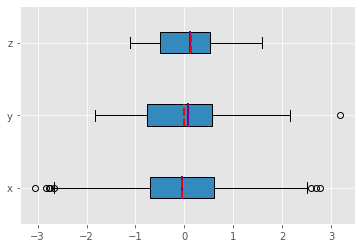

In [187]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True, labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'}, meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

### Histograms

In [188]:
hist, bin_edges = np.histogram(x, bins=10)

In [189]:
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [190]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

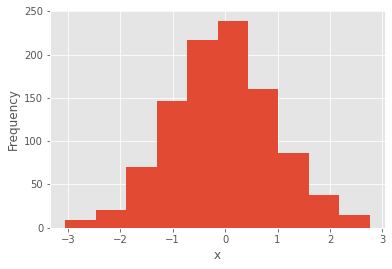

In [191]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

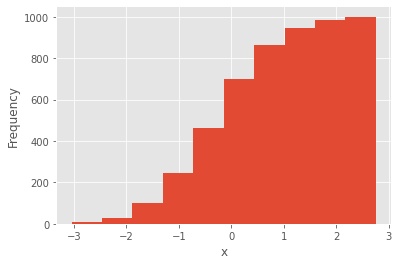

In [192]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

### Pie Charts

In [193]:
x, y, z = 128, 256, 1024

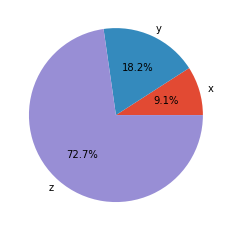

In [194]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

In [195]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

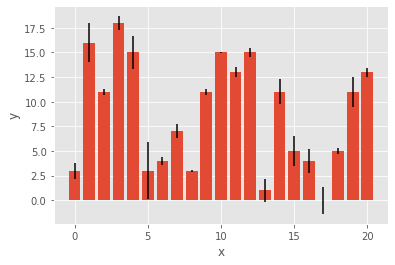

In [197]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### X-Y Plots or Scatter Plot

In [198]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

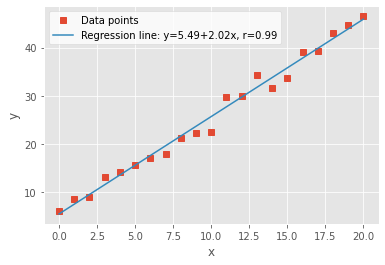

In [199]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### Heatmaps

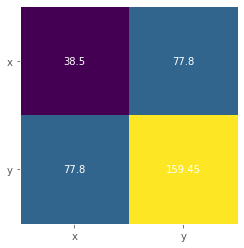

In [200]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

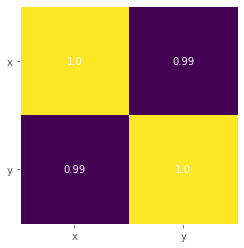

In [201]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()